In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("amsterdam_weekdays.csv")

In [3]:
df.head(3)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [5]:
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [6]:
df = df.drop(columns="Unnamed: 0")

In [7]:
df.shape

(1103, 19)

<AxesSubplot:xlabel='room_type', ylabel='count'>

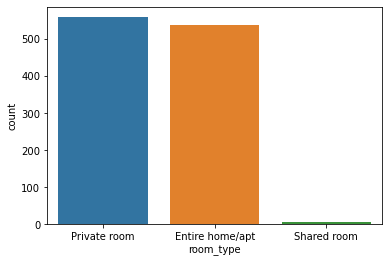

In [8]:
sns.countplot(df["room_type"])

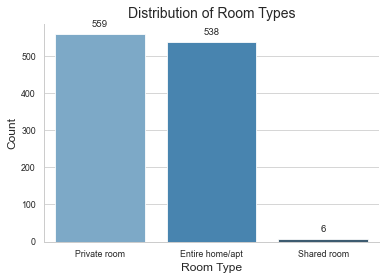

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context
sns.set_style("whitegrid")
sns.set_context("paper")

# Create the countplot
ax = sns.countplot(x="room_type", data=df, palette="Blues_d")

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords="offset points")

# Set labels and title
ax.set_xlabel("Room Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Distribution of Room Types", fontsize=14)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

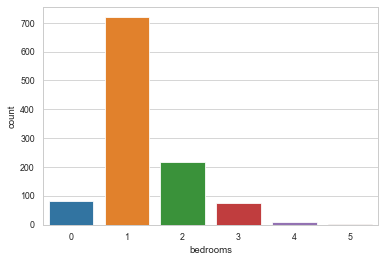

In [10]:
sns.countplot(df["bedrooms"])

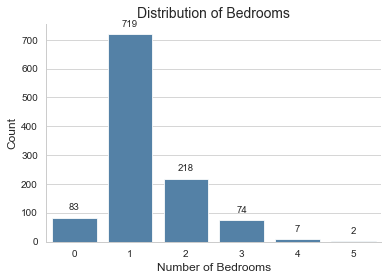

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context
sns.set_style("whitegrid")
sns.set_context("paper")

# Create the countplot
ax = sns.countplot(x="bedrooms", data=df, color="steelblue")

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), ha="center", va="center", xytext=(0, 10), textcoords="offset points")

# Set labels and title
ax.set_xlabel("Number of Bedrooms", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Distribution of Bedrooms", fontsize=14)

# Set tick parameters
ax.tick_params(axis="x", labelsize=10, labelrotation=0)
ax.tick_params(axis="y", labelsize=10)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()


In [12]:
df.room_type.value_counts()

Private room       559
Entire home/apt    538
Shared room          6
Name: room_type, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["room_type"]=encoder.fit_transform(df["room_type"])
df["room_shared"]=encoder.fit_transform(df["room_shared"])
df["room_private"]=encoder.fit_transform(df["room_private"])
df["host_is_superhost"]=encoder.fit_transform(df["host_is_superhost"])

In [14]:
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,1,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,1,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,1,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,1,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,1,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,0,0,0,2.0,0,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,1,0,1,2.0,0,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,1,0,1,2.0,0,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,0,0,0,4.0,0,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [15]:
df["guest_satisfaction_overall"].value_counts()

100.0    190
98.0     122
96.0     121
97.0      95
95.0      82
94.0      69
93.0      67
99.0      65
90.0      51
92.0      48
91.0      30
88.0      30
80.0      24
87.0      21
89.0      20
86.0      14
85.0      13
84.0      11
83.0       6
82.0       5
60.0       3
81.0       3
78.0       3
75.0       2
77.0       1
74.0       1
73.0       1
76.0       1
70.0       1
65.0       1
47.0       1
20.0       1
Name: guest_satisfaction_overall, dtype: int64

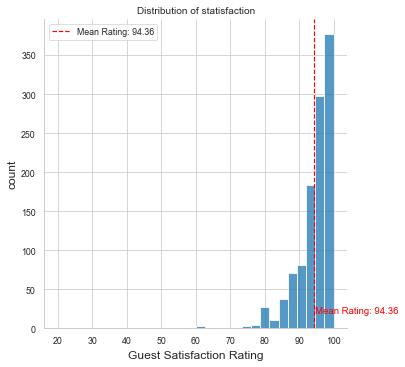

In [16]:
sns.displot(df["guest_satisfaction_overall"],kde=False,bins=30)
plt.xlabel("Guest Satisfaction Rating",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title("Distribution of statisfaction",fontsize=10)
mean = df['guest_satisfaction_overall'].mean()
plt.axvline(x=mean, color='r', linestyle='--', label='Mean Rating: {:.2f}'.format(mean))
plt.text(x=mean+0.1, y=20, s='Mean Rating: {:.2f}'.format(mean), color='r')
plt.legend()

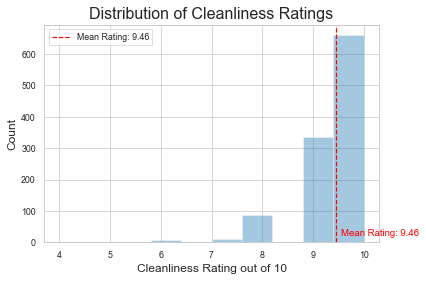

In [17]:
# create a histogram of the cleanliness_rating column using seaborn
sns.distplot(df['cleanliness_rating'], kde=False, bins=10)

# set the x-axis label
plt.xlabel('Cleanliness Rating out of 10', fontsize=12)

# set the y-axis label
plt.ylabel('Count', fontsize=12)

# set the title of the plot
plt.title('Distribution of Cleanliness Ratings', fontsize=16)

# add a vertical line for the mean cleanliness_rating
mean = df['cleanliness_rating'].mean()
plt.axvline(x=mean, color='r', linestyle='--', label='Mean Rating: {:.2f}'.format(mean))

# add a text box to display the mean rating value
plt.text(x=mean+0.1, y=20, s='Mean Rating: {:.2f}'.format(mean), color='r')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()


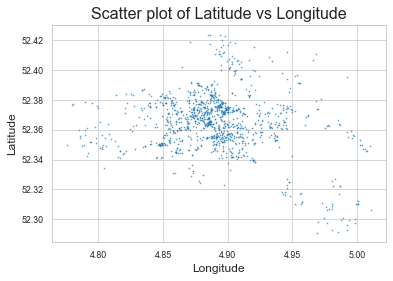

In [18]:
import matplotlib.pyplot as plt

# plot latitude vs longitude as a scatter plot
plt.scatter(df["lng"],df["lat"], s=1, alpha=0.5)

# set the x-axis label
plt.xlabel('Longitude', fontsize=12)

# set the y-axis label
plt.ylabel('Latitude', fontsize=12)

# set the title of the plot
plt.title('Scatter plot of Latitude vs Longitude', fontsize=16)

# display the plot
plt.show()


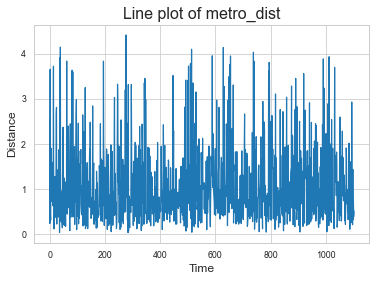

In [19]:
import matplotlib.pyplot as plt

# plot the distance column as a line plot
plt.plot(df['metro_dist'])

# set the x-axis label
plt.xlabel('Time', fontsize=12)

# set the y-axis label
plt.ylabel('Distance', fontsize=12)

# set the title of the plot
plt.title('Line plot of metro_dist', fontsize=16)

# display the plot
plt.show()


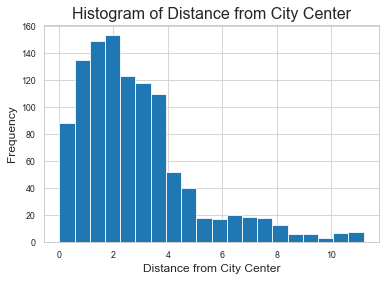

In [20]:
plt.hist(df['dist'], bins=20)

# set the x-axis label
plt.xlabel('Distance from City Center', fontsize=12)

# set the y-axis label
plt.ylabel('Frequency', fontsize=12)

# set the title of the plot
plt.title('Histogram of Distance from City Center', fontsize=16)

# display the plot
plt.show()

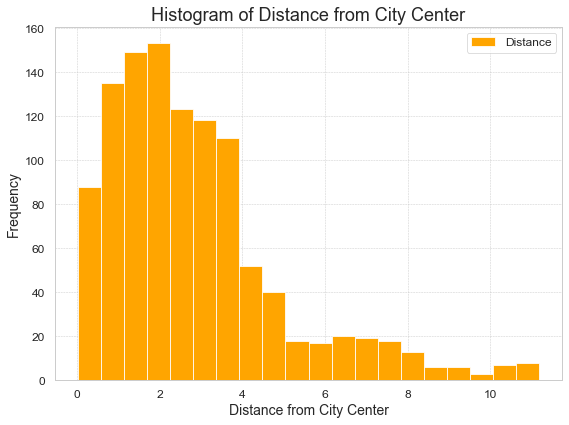

In [21]:
import matplotlib.pyplot as plt

# plot a histogram of the "dist" column with 20 bins
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['dist'], bins=20, color='orange', edgecolor='white')

# set the x-axis label
ax.set_xlabel('Distance from City Center', fontsize=14)

# set the y-axis label
ax.set_ylabel('Frequency', fontsize=14)

# set the title of the plot
ax.set_title('Histogram of Distance from City Center', fontsize=18)

# customize the ticks and gridlines
ax.tick_params(axis='both', labelsize=12, length=6, width=2)
ax.grid(linestyle='--', linewidth=0.5)

# add a legend and adjust the plot layout
ax.legend(['Distance'], fontsize=12)
plt.tight_layout()

# display the plot
plt.show()


In [22]:
df["room_shared"].value_counts()

0    1097
1       6
Name: room_shared, dtype: int64

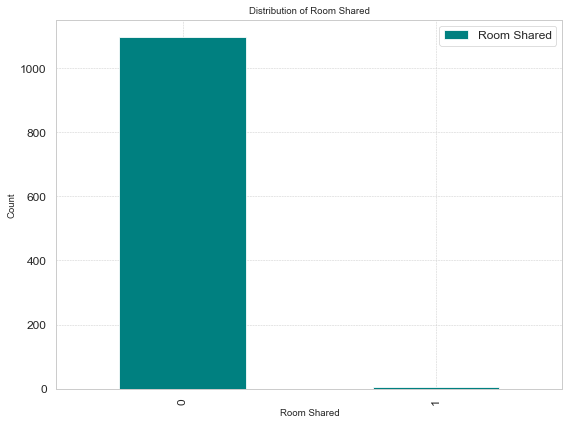

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

df["room_shared"].value_counts().plot(kind='bar',color='teal', edgecolor='white', ax=ax)

# set the x-axis label
plt.xlabel('Room Shared')

# set the y-axis label
plt.ylabel('Count')

# set the title of the plot
plt.title('Distribution of Room Shared')
ax.tick_params(axis='both', labelsize=12, length=6, width=2)
ax.grid(linestyle='--', linewidth=0.5)
ax.legend(['Room Shared'], fontsize=12)
plt.tight_layout()
plt.show()

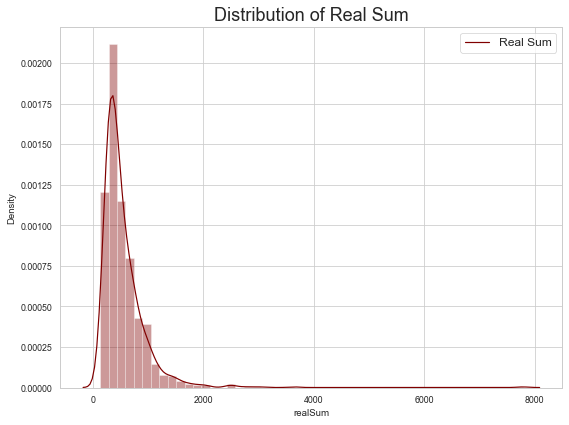

In [24]:

fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df["realSum"], color = "Maroon")
ax.set_title('Distribution of Real Sum', fontsize=18)

ax.legend(['Real Sum'], fontsize=12)
plt.tight_layout()


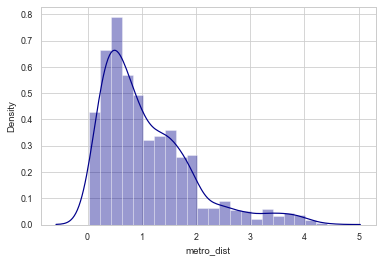

In [25]:

sns.distplot(df["metro_dist"], color = "DarkBlue");


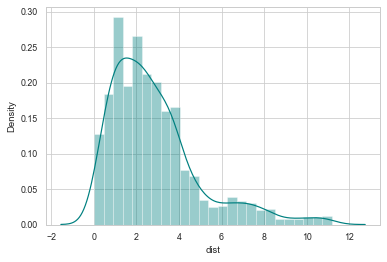

In [26]:
sns.distplot(df["dist"], color = "teal");


In [27]:
df.corr()


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
realSum,1.000000,-0.438130,-0.046853,-0.433549,0.526992,-0.063118,-0.104973,-0.026808,0.022938,0.136025,0.491703,-0.258692,-0.142298,0.244193,0.244193,0.208429,0.208429,-0.029993,0.093704
room_type,-0.438130,1.000000,0.214761,0.957818,-0.371752,0.170908,0.242273,0.073754,0.023377,-0.135994,-0.382939,0.111215,0.051825,0.002508,0.002508,0.036022,0.036022,0.072297,-0.045070
room_shared,-0.046853,0.214761,1.000000,-0.074968,-0.008908,0.006581,0.030710,-0.026678,-0.027327,-0.018581,-0.028276,0.039411,0.017080,-0.008128,-0.008128,-0.008272,-0.008272,-0.005203,0.002321
room_private,-0.433549,0.957818,-0.074968,1.000000,-0.376941,0.172563,0.238326,0.083153,0.031909,-0.133384,-0.382664,0.101955,0.047888,0.004953,0.004953,0.039213,0.039213,0.075347,-0.046700
person_capacity,0.526992,-0.371752,-0.008908,-0.376941,1.000000,-0.091513,-0.139980,0.079923,-0.065680,0.035399,0.660776,-0.046410,-0.003328,0.044485,0.044485,0.008940,0.008940,-0.008643,0.074367
host_is_superhost,-0.063118,0.170908,0.006581,0.172563,-0.091513,1.000000,0.096795,-0.138505,0.314499,0.299440,-0.062919,0.017490,0.040076,-0.023030,-0.023030,-0.018040,-0.018040,-0.056270,0.016724
multi,-0.104973,0.242273,0.030710,0.238326,-0.139980,0.096795,1.000000,-0.240799,0.012552,-0.051060,-0.106612,0.007800,-0.028255,0.003922,0.003922,0.045876,0.045876,-0.027295,-0.020794
biz,-0.026808,0.073754,-0.026678,0.083153,0.079923,-0.138505,-0.240799,1.000000,-0.059120,-0.119484,-0.038099,-0.044655,-0.043235,0.100805,0.100805,0.096151,0.096151,0.074179,0.049952
cleanliness_rating,0.022938,0.023377,-0.027327,0.031909,-0.065680,0.314499,0.012552,-0.059120,1.000000,0.648809,-0.015326,-0.021712,0.019532,-0.006147,-0.006147,0.010937,0.010937,-0.030684,0.026053
guest_satisfaction_overall,0.136025,-0.135994,-0.018581,-0.133384,0.035399,0.299440,-0.051060,-0.119484,0.648809,1.000000,0.104254,-0.059805,0.050810,0.006316,0.006316,-0.004934,-0.004934,-0.052624,0.090223


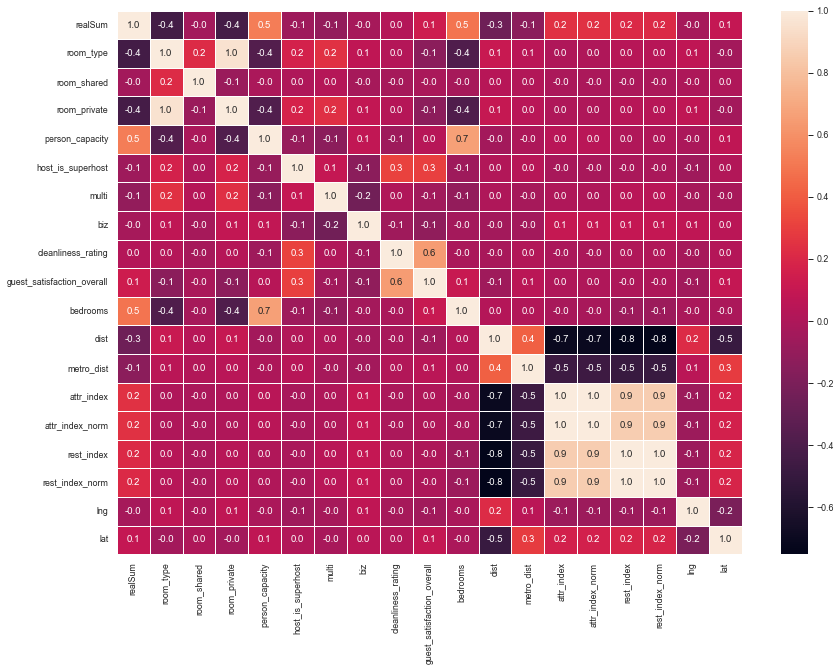

In [28]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [29]:
data_with_six_person_capacity = df[df['person_capacity'] == 6]
locked_data = df.loc[970]
df = df.drop(970)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


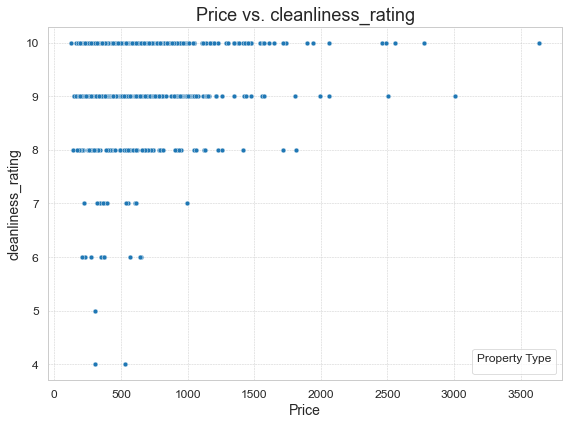

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x="realSum", y="cleanliness_rating", palette="Set2", ax=ax)

# set the x-axis label
ax.set_xlabel('Price', fontsize=14)

# set the y-axis label
ax.set_ylabel('cleanliness_rating', fontsize=14)

# set the title of the plot
ax.set_title('Price vs. cleanliness_rating', fontsize=18)

# customize the ticks and gridlines
ax.tick_params(axis='both', labelsize=12, length=6, width=2)
ax.grid(linestyle='--', linewidth=0.5)

# add a legend and adjust the plot layout
ax.legend(fontsize=12, title='Property Type', title_fontsize=12)
plt.tight_layout()

# display the plot
plt.show()

In [31]:
df.dtypes

realSum                       float64
room_type                       int64
room_shared                     int64
room_private                    int64
person_capacity               float64
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [32]:
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,1,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,1,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,1,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,1,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,1,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,0,0,0,2.0,0,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,1,0,1,2.0,0,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,1,0,1,2.0,0,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,0,0,0,4.0,0,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


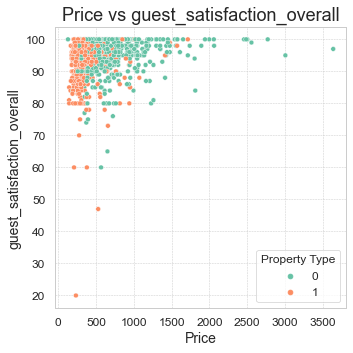

In [33]:
fig, ax = plt.subplots(figsize=(5 ,5))
sns.scatterplot(data=df, x="realSum", y="guest_satisfaction_overall",hue="room_private", palette="Set2", ax=ax)

# set the x-axis label
ax.set_xlabel('Price', fontsize=14)

# set the y-axis label
ax.set_ylabel('guest_satisfaction_overall', fontsize=14)

# set the title of the plot
ax.set_title('Price vs guest_satisfaction_overall', fontsize=18)

# customize the ticks and gridlines
ax.tick_params(axis='both', labelsize=12, length=6, width=2)
ax.grid(linestyle='--', linewidth=0.5)

# add a legend and adjust the plot layout
ax.legend(fontsize=12, title='Property Type', title_fontsize=12)
plt.tight_layout()

# display the plot
plt.show()

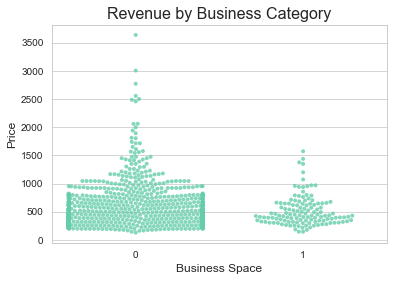

In [34]:
#biz Whether a particular listing offers business facilities like meeting area/conference rooms in addition to accommodation options. (Boolean)

sns.set_style("whitegrid")

# Create the swarm plot
sns.swarmplot(data=df, x="biz", y="realSum", size=4, alpha=0.8, color='mediumaquamarine')

# Add x-axis and y-axis labels
plt.xlabel("Business Space", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Set plot title
plt.title("Revenue by Business Category", fontsize=16)

# Set the font size for tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()





<AxesSubplot:xlabel='person_capacity', ylabel='realSum'>

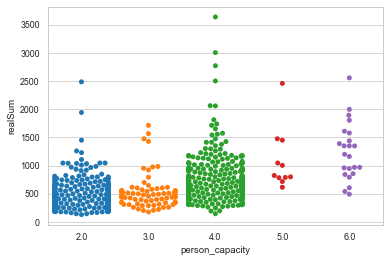

In [35]:
sns.swarmplot(data=df, x="person_capacity", y="realSum")

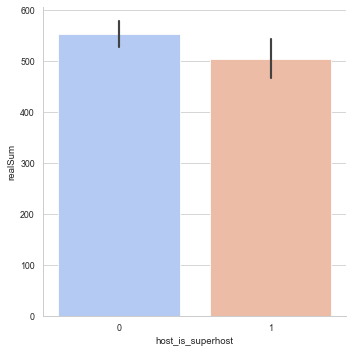

In [36]:
sns.catplot(data=df, x="host_is_superhost", y="realSum", kind="bar",palette="coolwarm")


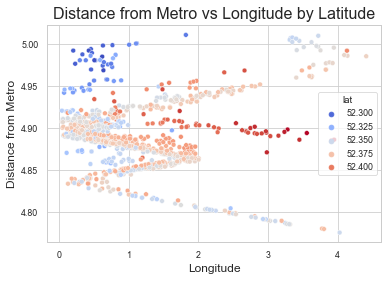

In [37]:
sns.scatterplot(data=df, x="metro_dist", y="lng", hue="lat", palette="coolwarm")

plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Distance from Metro", fontsize=12)
plt.title("Distance from Metro vs Longitude by Latitude", fontsize=16)
plt.show()


<AxesSubplot:xlabel='dist', ylabel='lng'>

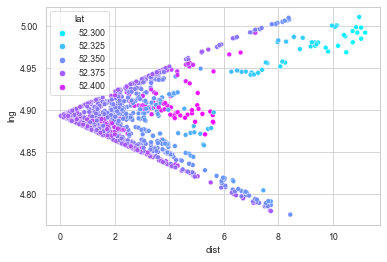

In [38]:
sns.scatterplot(data=df, x="dist", y="lng", hue="lat", palette="cool")


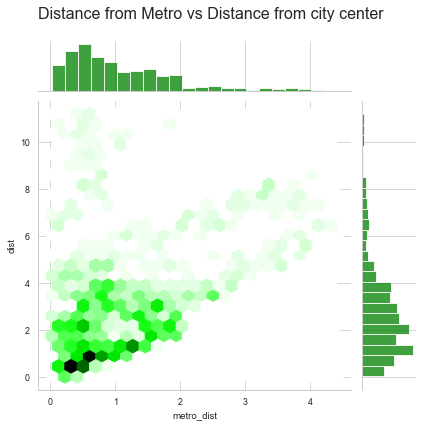

In [39]:
sns.jointplot(data=df, x="metro_dist", y="dist", kind="hex", color="g")

# Set plot title
plt.subplots_adjust(top=0.9)
plt.suptitle('Distance from Metro vs Distance from city center', fontsize=16)

# Show the plot
plt.show()

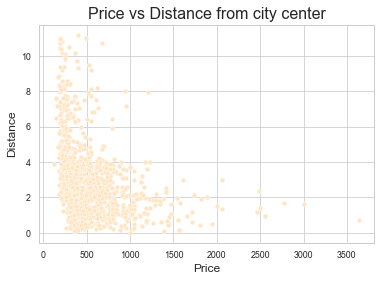

In [40]:
sns.set_palette("OrRd")

sns.set_palette("OrRd")

# Create a scatterplot with price as x-axis and overall satisfaction as y-axis
sns.scatterplot(data=df, x="realSum", y="dist")

# Add x-axis and y-axis labels
plt.xlabel("Price", fontsize=12)
plt.ylabel("Distance", fontsize=12)

# Set plot title
plt.title("Price vs Distance from city center", fontsize=16)

# Show the plot
plt.show()


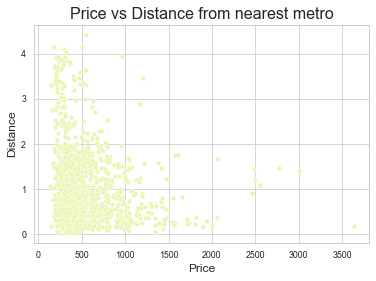

In [41]:
sns.set_palette("YlGnBu")

sns.scatterplot(data=df, x="realSum", y="metro_dist")

# Add x-axis and y-axis labels
plt.xlabel("Price", fontsize=12)
plt.ylabel("Distance", fontsize=12)

# Set plot title
plt.title("Price vs Distance from nearest metro", fontsize=16)

# Show the plot
plt.show()

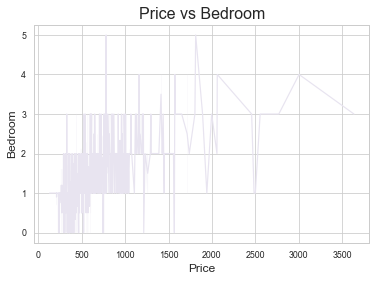

In [42]:
sns.set_palette("PuBu")
sns.lineplot(data=df, x="realSum", y="bedrooms")

# Add x-axis and y-axis labels
plt.xlabel("Price", fontsize=12)
plt.ylabel("Bedroom", fontsize=12)

# Set plot title
plt.title("Price vs Bedroom", fontsize=16)

# Show the plot
plt.show()

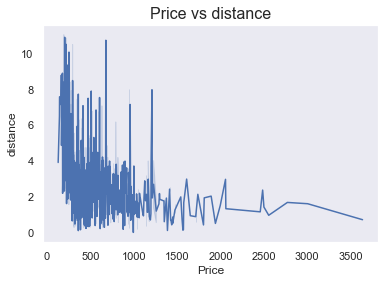

In [43]:
sns.set_palette("BuGn")
sns.set_theme(style="dark")
sns.lineplot(data=df, x="realSum", y="dist")

# Add x-axis and y-axis labels
plt.xlabel("Price", fontsize=12)
plt.ylabel("distance", fontsize=12)

# Set plot title
plt.title("Price vs distance", fontsize=16)

# Show the plot
plt.show()

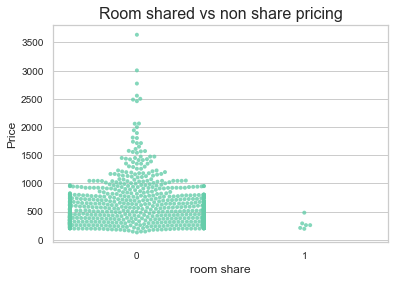

In [44]:
sns.set_style("whitegrid")

# Create the swarm plot
sns.swarmplot(data=df, x="room_shared", y="realSum", size=4, alpha=0.8, color='mediumaquamarine')

# Add x-axis and y-axis labels
plt.xlabel("room share", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Set plot title
plt.title("Room shared vs non share pricing", fontsize=16)

# Set the font size for tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


In [45]:
z_scores = np.abs((df - df.mean()) / df.std())

# identify data points with z-score greater than 3
outliers = z_scores > 3

# print the number of outliers in each column of the dataframe
print(outliers.sum())

realSum                       19
room_type                      0
room_shared                    6
room_private                   0
person_capacity               23
host_is_superhost              0
multi                          0
biz                            0
cleanliness_rating            23
guest_satisfaction_overall    12
bedrooms                       9
dist                          23
metro_dist                    23
attr_index                     9
attr_index_norm                9
rest_index                     5
rest_index_norm                5
lng                            2
lat                           17
dtype: int64


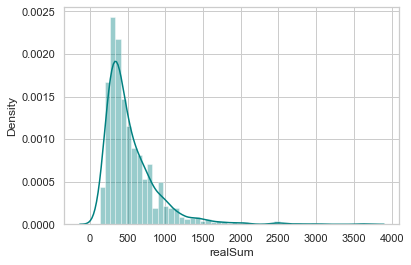

In [46]:
sns.distplot(df["realSum"], color = "teal");


In [47]:
df.describe()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,538.452571,0.518149,0.005445,0.507260,2.789474,0.293103,0.307623,0.115245,9.460980,94.357532,1.281307,2.841495,1.088577,271.140289,14.357058,341.695436,23.809830,4.891154,52.364826
std,355.529219,0.510682,0.073620,0.500174,1.040138,0.455392,0.461719,0.319462,0.798399,6.090085,0.738702,2.124205,0.836436,197.088743,10.435980,236.663016,16.491019,0.038900,0.019447
min,128.887118,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,309.797764,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,92.000000,1.000000,1.301469,0.462977,128.010961,6.778265,163.409111,11.386582,4.871000,52.354575
50%,430.248635,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,10.000000,96.000000,1.000000,2.338753,0.855523,208.203681,11.024523,260.912530,18.180761,4.890005,52.365540
75%,656.738453,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000,0.000000,10.000000,98.000000,2.000000,3.648899,1.507506,386.480878,20.464419,469.439726,32.711235,4.907323,52.375248
max,3637.663159,2.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


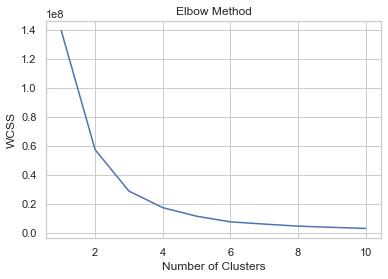

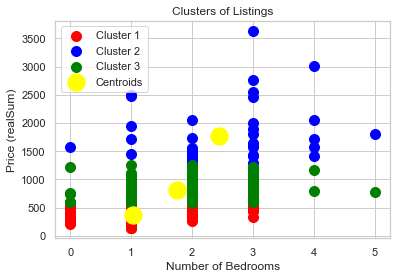

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# load the data

# select the features to be clustered
X = df[["bedrooms", "realSum"]]

# determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# fit the KMeans model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# plot the clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Listings')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (realSum)')
plt.legend()
plt.show()


In [49]:
X = df.drop(columns="realSum")
y = df.realSum

In [50]:
X

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,1,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,1,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,1,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,1,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,0,0,0,2.0,0,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1,0,1,2.0,0,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1,0,1,2.0,0,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,0,0,0,4.0,0,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
models = [LinearRegression(), 
          Ridge(), 
          Lasso(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor()]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']

# Evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    print(f'{name}: MSE={mse:.2f}, R2={r2:.2f}')

Linear Regression: MSE=54324.13, R2=0.53
Ridge Regression: MSE=54634.99, R2=0.53
Lasso Regression: MSE=54900.12, R2=0.52
Decision Tree: MSE=0.00, R2=1.00
Random Forest: MSE=8136.43, R2=0.93


In [52]:
from sklearn import metrics
error_score = metrics.r2_score(y_train,y_pred)
error_score

0.9295169372054783

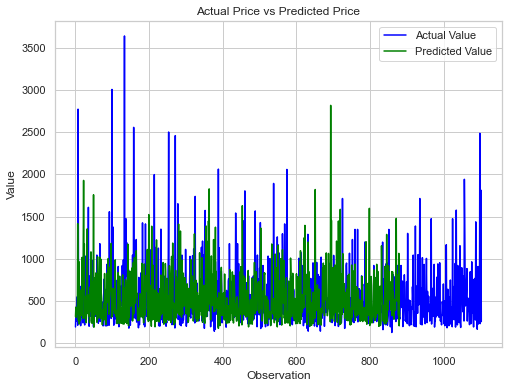

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, color='blue', label='Actual Value')
ax.plot(y_pred, color='green', label='Predicted Value')

# Set the labels and title
ax.set_xlabel('Observation')
ax.set_ylabel('Value')
ax.set_title('Actual Price vs Predicted Price')

# Add grid and legend
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

In [54]:
dfpredictedvsread = pd.DataFrame({'y_pred': y_pred, 'y': y_train})
dfpredictedvsread

,y_pred,y
577,317.177138,337.918590
414,428.685586,387.130035
322,309.671221,335.575188
230,420.722705,442.668666
65,351.142409,330.419703
...,...,...
360,559.414618,439.856584
466,332.310829,301.127176
299,1064.844281,1112.178661
493,207.590280,196.611440


In [55]:
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE={mse:.2f}, R2={r2:.2f}')

Linear Regression: MSE=74346.19, R2=0.56
Ridge Regression: MSE=73682.37, R2=0.56
Lasso Regression: MSE=73801.14, R2=0.56
Decision Tree: MSE=120586.50, R2=0.29
Random Forest: MSE=70240.48, R2=0.58


In [56]:
from sklearn import metrics
error_score = metrics.r2_score(y_test,y_pred)
error_score

0.5843660643434206

In [57]:
dfpredictedvsreadtest = pd.DataFrame({'y_pred': y_pred, 'y': y_test})
dfpredictedvsreadtest

,y_pred,y
287,251.512666,209.031472
738,433.330209,313.312868
440,984.257024,1179.668643
197,369.831041,282.614299
263,424.854123,436.341481
...,...,...
102,781.011412,1376.514424
1028,296.180254,280.036557
365,858.749092,540.622876
438,365.570736,272.537670


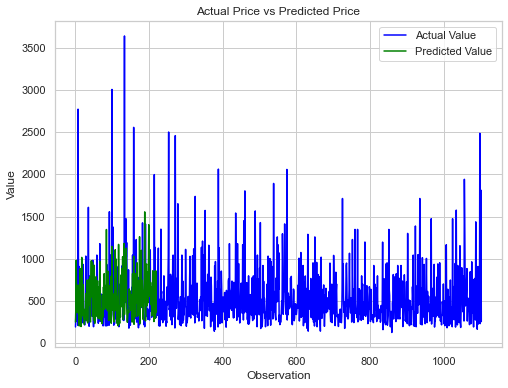

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y, color='blue', label='Actual Value')
ax.plot(y_pred, color='green', label='Predicted Value')

# Set the labels and title
ax.set_xlabel('Observation')
ax.set_ylabel('Value')
ax.set_title('Actual Price vs Predicted Price')

# Add grid and legend
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score


models = [LinearRegression(), 
          Ridge(), 
          Lasso(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor()]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']

# Evaluate each model
for model, name in zip(models, model_names):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{name}: MSE={mse:.2f}, R2={r2:.2f}')

Linear Regression: MSE=57878.21, R2=0.54
Ridge Regression: MSE=58021.18, R2=0.54
Lasso Regression: MSE=58223.07, R2=0.54
Decision Tree: MSE=0.00, R2=1.00
Random Forest: MSE=8077.12, R2=0.94


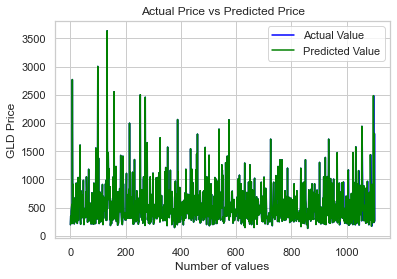

In [60]:
y_pred = list(y)
plt.plot(y, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()